# Assignment 2 - Question 1
The objective of this assignment is to get you familiarize with  the  problem  of  `Clustering`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q1.ipynb`.

In [1]:
import nltk
nltk.download('punkt')    
# if u r facing issues while importing nltk, please uncomment above line and run
import re
import numpy as np
import sklearn
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cdist
import random
import sklearn.metrics 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer


# Dataset



*   Try to explore the dataset and first understand
*   Steps while processing the dataset:

1.   Load the dataset
>> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: train and test. Here, we only use train part of the dataset as we don't need any training.

2.   pre-processing of the dataset
>>   A set of basic pre-processing steps are given below, if you can do it better, it is appreciable
3.   Trying to obtain the embeddings for the text. 
>> Here, we used bert model to obtain the embeddings, if you want to use anyother sentence/word embeddings (ELMo,universal sentence encoder, or other bert models) you can use it, but not mandatorily change it)

PS: You need not completely understand how bert works. If you are interested, few links will be mentioned below.

In [3]:
# loading of dataset

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

# print(list(newsgroups_train))
#['data', 'filenames', 'target_names', 'target', 'DESCR']
# all we require for our task is data and target. 
#target_names describe the different groups present (which are 20) all over the dataset

# print(list(newsgroups_train.target_names))

In [4]:
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [5]:
#preprocessing of sentences and the article

def remove_punct(text):
    text = re.sub('[^a-zA-Z0-9 ]+','', text)
    return text

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_tag(text):   
    text=' '.join(text)
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

def pre_process_sentence(sentence):
    sentence = sentence.lower()
    sentence = remove_punct(remove_urls(sentence))
    return sentence

def pre_process_article(article):
    article = str(article).replace("\n", '')
    article = sent_tokenize(article)
    sentences = []
    for each in article:
        if len(each.split(":")) > 1:
            continue
        sentences.append(pre_process_sentence(each))
    return sentences



In [6]:
def get_review_embedding(article):
  sentences = pre_process_article(article)

  #here review(input) has to be a list of sentences
  #use suitable embeddings to get an embedding for the whole review
  #usage of sentence embeddings is recommended

  sentence_embeddings = bert_model.encode(sentences)

  # take average of all sentence embeddings to obtain a review embedding 
  review_embedding = np.zeros(768)
  for each in sentence_embeddings:
    review_embedding = np.add(np.array(each), review_embedding)

  return review_embedding


In [7]:
X, y = newsgroups_train.data, newsgroups_train.target

In [8]:
X_embedded = []
count = 0
for article in X:
  count = count + 1
  if count%1000 ==0:
    print(count)  
  X_embedded.append(get_review_embedding(article))

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000


In [9]:
# def dist(v1,v2):
#     return np.sqrt(np.sum(np.square(np.subtract(v1,v2))))

In [10]:
# def update_centroids(k,final_list, X_embedded, centroids):
#   newCentroids = []
#   for i in range(k):
#     l = []
#     for j in final_list[i]:
#       l.append(X_embedded[j])
#     # print("L = ")
#     # print(l)
#     if len(final_list[i]) == 0:
#       newCentroids.append(centroids[i])
#     else:
#       newCentroids.append(np.mean(l,axis=0))
#   return newCentroids


In [11]:
# def mera_apna_kmeans(k,X_embedded, niter):
#   z = random.sample(range(0,len(X)), k)
#   # print(z)
#   centroids = []
#   for i in z:
#     centroids.append(X_embedded[i])
  
#   # print(centroids)
#   for j in range(niter):
#     final_list = []
#     for i in range(k):
#       final_list.append([])
#     for i in range(len(X)):
#       min_d = 999999999999999999
#       min_c = -1
#       for c in range(len(centroids)):
#         d = dist(X_embedded[i],centroids[c])
#         if d<min_d:
#           min_d = d
#           min_c = c
#       final_list[min_c].append(i)
#     # print(centroids)
#     old_centroids = centroids.copy()
#     centroids = update_centroids(k,final_list, X_embedded, centroids)
#     # print(j)

#   return centroids


In [12]:
# #finding distortion 
# distortions = []
# for k in range(1,40):
#   final_centroids = mera_apna_kmeans(k,X_new,10)
#   d = sum(np.min(cdist(X_new, final_centroids,'euclidean'), axis=1)/ len(X_new))
#   distortions.append(d)
#   print("For K = ", k,d)

# distortions

In [13]:
# data visualization 

# Try to visualise the points from all the domains and try to visualise them 
# hint: you can use PCA 

import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt




# K_Means Algorithm


In [14]:
# code to write your Kmeans algorithm
# implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca = pca.fit_transform(X_embedded)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(pca)


KMeans(n_clusters=3)

In [15]:
kmeans.cluster_centers_

array([[ 5.15673117e+02, -4.90830222e+01],
       [ 3.16542608e+03,  9.49278473e+01],
       [-2.42180043e+01,  1.32716335e+00]])

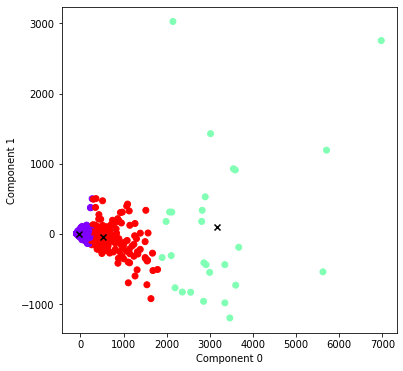

In [16]:
#code for visualisation of clusters
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(pca[:,0], pca[:,1],c = kmeans.fit_predict(pca), cmap ='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],color='black', marker = 'x')
plt.xlabel('Component 0')
plt.ylabel('Component 1')
plt.show()

# Elbow method



*   Try to understand how elbow method works
*   Plot the graph between average distance and the number of clusters
*   Use elbow method to find the optimal number of clusters, 







#### Elbow Method

In the Elbow method, we are actually varying the number of clusters (K) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.


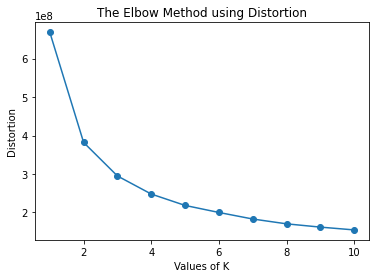

In [17]:
def elbow_method():
  distance = []
  K = [x for x in range(1,11)]
  for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X_embedded)
    dist  = kmeans.inertia_
    # dist = sum(np.min(cdist(X_embedded, kmeans.cluster_centers_,
                                        # 'euclidean'), axis = 1))

    distance.append(dist)
  plt.plot(K, distance, marker = 'o')
  plt.xlabel('Values of K')
  plt.ylabel('Distortion')
  plt.title('The Elbow Method using Distortion')
  plt.show()
  return

elbow_method()

From the above we can say that the optimal value of k lies between 3 to 5 as we can see the elbow on this values. So get the better insight now we will see the silhouette method. We will take the value of k from 3 to 5 and check thier Silhouette score. The value of K for which the silhoette score is highest will be our optimal k. 

# Silhouette Method


*   Compute silhouette score varying the K number of clusters

*   Plot the graph between silhoutte score and number of clusters 

*   Find the optimal number of clusters using silhouette method




> Report the optimal number of clusters you obtained from above two methods (elbow and silhouette)




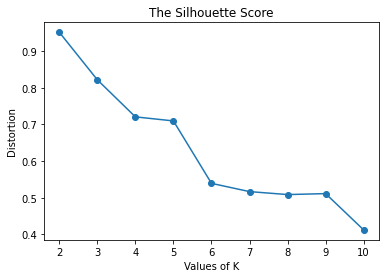

In [18]:
def silhouette_scor():
  silhouette = []
  K = [x for x in range(2,11)]
  for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X_embedded)
    # cluster_labels = 
    dist = sklearn.metrics.silhouette_score(X_embedded, kmeans.labels_)
    silhouette.append(dist)

  plt.plot(K, silhouette, marker ='o')
  plt.xlabel('Values of K')
  plt.ylabel('Distortion')
  plt.title('The Silhouette Score')
  plt.show()
  return
  
silhouette_scor() 

From Elbow method we have found that value of k can be from 3 to 5. Silhouette score for k = 2 is highest but value of elbow method suggest that optimal k should be between 3 to 5 so we will check the silhouette score for value of k between 3 to 5. We found that k=3 has highest silhoutte score. Hence k = 3 is our optimal value for k. 

# Agglomerative clustering

In [19]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import AgglomerativeClustering

# def AgglomerativeClusterings():
#   clustering = AgglomerativeClustering().fit(visuals)
#   clustering.labels_


In [20]:
#code for visualisation of clusters

ac2 = AgglomerativeClustering(distance_threshold=0, n_clusters = None)
ac2 = ac2.fit(X_embedded)
# Visualizing the clustering

# Dendogram


*   Try to understand the difference between agglomerative clustering and "Divisive" clustering. 
*   Plot dendograms for both kinds of clustering
*   Find the optimal number of clusters with the help of Dendogram



In [21]:
import scipy.cluster.hierarchy as shc 

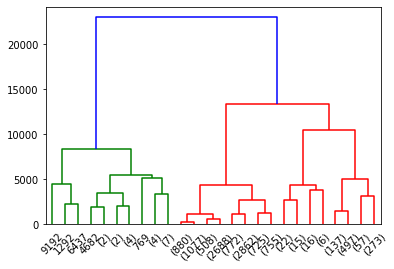

In [22]:
def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    shc.dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(ac2, truncate_mode="level", p=4)

With the help of dendogram we can find the optimal number of clusters. To find optimal number of clusters we draw a line parallel to x-axis and see that line which crosses the largest distance line. IN this case the optimal number of clusters is 2.

# useful links to understand BERT

*  https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270#:~:text=How%20BERT%20works,%2Dwords)%20in%20a%20text.&text=As%20opposed%20to%20directional%20models,sequence%20of%20words%20at%20once.


